## Develop a Word-Level Neural Language Model and Use it to Generate Text
- Language modeling involves predicting the next word in a sequence given the sequence of words already observed in the sequence. The predicted word will be fed in as input to in turn generate the next word.
- Neural network models are a preferred method for developing statistical language models because they can use a distributed representation where different words with similar meanings have similar representation and because they can use a large context of recently observed words when making predictions.

In [ ]:
# download the data and save it 
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/republic_clean.txt

In [ ]:
# read the file in text string
text = open('republic_clean.txt.3' , 'r').read()
text = text.lower()
print(text)

In [3]:
# create list of sentences
sentences = text.split('\n')
print(len(sentences))

24326


In [4]:
print(sentences[:3])

['the project gutenberg ebook of the republic, by plato', '', 'this ebook is for the use of anyone anywhere at no cost and with']


In [5]:
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

First, the Tokenizer is fit on the source text to develop the mapping from words to unique integers. Then sequences of text can be converted to sequences of integers by calling the texts_to_sequences() function.

In [6]:
tokenizer = Tokenizer(oov_token='<UNK>')
# Updates internal vocabulary based on a list of texts
tokenizer.fit_on_texts(sentences)

In [7]:
# dictionary mapping words (str) to their rank/index (int)
print(tokenizer.word_index)

{'<UNK>': 1, 'the': 2, 'of': 3, 'and': 4, 'to': 5, 'is': 6, 'in': 7, 'a': 8, 'he': 9, 'that': 10, 'be': 11, 'which': 12, 'not': 13, 'or': 14, 'are': 15, 'they': 16, 'i': 17, 'as': 18, 'will': 19, 'but': 20, 'have': 21, 'we': 22, 'you': 23, 'by': 24, 'his': 25, 'them': 26, 'for': 27, 'said': 28, 'with': 29, 'their': 30, 'who': 31, 'this': 32, 'one': 33, 'there': 34, 'at': 35, 'all': 36, 'has': 37, 'may': 38, 'what': 39, 'from': 40, 'if': 41, 'when': 42, 'other': 43, 'then': 44, 'him': 45, 'no': 46, 'state': 47, 'good': 48, 'an': 49, 'any': 50, 'was': 51, 'only': 52, 'would': 53, 'man': 54, 'more': 55, 'do': 56, 'true': 57, 'on': 58, 'our': 59, "'": 60, 'than': 61, 'like': 62, 'must': 63, 'were': 64, 'yes': 65, 'been': 66, 'can': 67, 'should': 68, 'into': 69, 'such': 70, 'us': 71, 'men': 72, 'say': 73, 'so': 74, 'it': 75, 'also': 76, 'life': 77, 'own': 78, 'first': 79, 'now': 80, 'another': 81, 'same': 82, 'justice': 83, 'some': 84, 'these': 85, 'soul': 86, 'nature': 87, 'about': 88, 've

In [8]:
# dictionary mapping words (str) to the number of times they appeared on during fit
print(tokenizer.word_counts)

OrderedDict([('the', 15347), ('project', 3), ('gutenberg', 4), ('ebook', 5), ('of', 10334), ('republic', 108), ('by', 1344), ('plato', 325), ('this', 989), ('is', 4657), ('for', 1193), ('use', 144), ('anyone', 2), ('anywhere', 5), ('at', 878), ('no', 698), ('cost', 3), ('and', 9508), ('with', 1072), ('almost', 38), ('restrictions', 2), ('whatsoever', 1), ('you', 1397), ('may', 819), ('copy', 7), ('it', 407), ('give', 103), ('away', 100), ('or', 2210), ('re', 5), ('under', 153), ('terms', 43), ('license', 1), ('included', 12), ('online', 1), ('www', 1), ('org', 1), ('title', 8), ('author', 24), ('translator', 2), ('b', 6), ('jowett', 3), ('posting', 1), ('date', 5), ('august', 1), ('27', 11), ('2008', 1), ('1497', 1), ('release', 4), ('october', 1), ('1998', 1), ('last', 98), ('updated', 1), ('june', 1), ('22', 1), ('2016', 1), ('language', 55), ('english', 10), ('start', 5), ('produced', 4), ('sue', 1), ('asscher', 1), ('translated', 5), ('benjamin', 1), ('note', 31), ('etext', 1), ('1

In [9]:
print(len(tokenizer.word_index))
print(len(tokenizer.word_counts))

10830
10829


In [10]:
'<UNK>' in tokenizer.word_counts.keys()

False

In [11]:
print("Total tokens: %d" % sum(tokenizer.word_counts.values()))
print('Unique tokens: %d' % len(tokenizer.word_index))

Total tokens: 218190
Unique tokens: 10830


We need to know the size of the vocabulary for defining the embedding layer later. We can determine the vocabulary by calculating the size of the mapping dictionary.

Words are assigned values from 1 to the total number of words (e.g. 7,409). The Embedding layer needs to allocate a vector representation for each word in this vocabulary from index 1 to the largest index and because indexing of arrays is zero-offset, the index of the word at the end of the vocabulary will be 7,409; that means the array must be 7,409 + 1 in length.

Therefore, when specifying the vocabulary size to the Embedding layer, we specify it as 1 larger than the actual vocabulary.

In [19]:
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size: ", vocab_size)

Vocabulary Size:  10831


In [12]:
# Transforms each sequence of text to a sequence of integers
sequences = tokenizer.texts_to_sequences(sentences)
print(sequences[:3])

[[2, 3862, 3251, 2802, 3, 2, 229, 24, 91], [], [32, 2802, 6, 27, 2, 174, 3, 4799, 2803, 35, 46, 3863, 4, 29]]


In [13]:
# Creating n_gram_sequences - organize into sequences of tokens
input_sequences = []

for sequence in sequences:
  for i in range(1, len(sequence)):
    n_gram_sequence = sequence[:i+1]
    input_sequences.append(n_gram_sequence)

print('Total N Gram Sequences: %d' % len(input_sequences))

Total N Gram Sequences: 198643


In [14]:
input_sequences[:3]

[[2, 3862], [2, 3862, 3251], [2, 3862, 3251, 2802]]

In [15]:
# find the maximum length among sequences
max_seq_len = max([len(seq) for seq in input_sequences])
print(max_seq_len)

19


We can now train a statistical language model from the prepared data. The model we will train is a neural language model. It has a few unique characteristics:

- It uses a distributed representation for words so that different words with similar meanings will have a similar representation.
- It learns the representation at the same time as learning the model.
It learns to predict the probability for the next word using the context of the last few words.


#### Sequence Inputs and Output
- Now that we have encoded the input sequences, we need to separate them into input (X) and output (y) elements. We will keep the last value of the sequence as our target label and all values before that as input to sequence model.We can do this with array slicing.

- After separating, we need to one hot encode the output word. This means converting it from an integer to a vector of 0 values, one for each word in the vocabulary, with a 1 to indicate the specific word at the index of the words integer value.

- This is so that the model learns to predict the probability distribution for the next word and the ground truth from which to learn from is 0 for all words except the actual word that comes next.

- Keras provides the to_categorical() that can be used to one hot encode the output words for each input-output sequence pair.

In [16]:
# Pads sequences to the same length
padded_sequences = pad_sequences(input_sequences , maxlen = max_seq_len)
print(padded_sequences[:3])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    2 3862]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    2 3862 3251]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    2 3862 3251 2802]]


In [17]:
import numpy as np
padded_sequences = np.array(padded_sequences)
print(padded_sequences.shape)

(198643, 19)


In [18]:
# form input output pairs from padded sequences - prepare training sequences and labels
x = padded_sequences[: , :-1]
labels = padded_sequences[: , -1]
print(x.shape , labels.shape)

(198643, 18) (198643,)


In [20]:
from keras.utils import to_categorical

# Encode Sequences - Converts a class vector (integers) to binary class matrix (one hot encoded)
y = to_categorical(labels , num_classes = vocab_size)
print(y.shape)

(198643, 10831)


In [21]:
from keras.models import Sequential
from keras.layers import Bidirectional, Embedding, LSTM, Dense, Dropout
from keras.optimizers import Adam

In [22]:
# define the model architecture and fit our language model on the training data
model = Sequential()

model.add(Embedding(vocab_size , 100, input_length = max_seq_len-1))
model.add(Bidirectional(LSTM(256)))
model.add(Dense(vocab_size , activation = 'softmax'))

adam = Adam(learning_rate=0.001)
model.compile(optimizer = adam , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 18, 100)           1083100   
_________________________________________________________________
bidirectional (Bidirectional (None, 512)               731136    
_________________________________________________________________
dense (Dense)                (None, 10831)             5556303   
Total params: 7,370,539
Trainable params: 7,370,539
Non-trainable params: 0
_________________________________________________________________


In [24]:
# initialize the callback for early stopping the training 
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'accuracy', patience = 2)

In [ ]:
hist = model.fit(x, y, epochs = 60, batch_size = 256, callbacks = [es])

In [37]:
# generating a sequence of new words given some seed text
seed_text = 'The Republic of Plato is the longest of his works with the exception of the Law'
next_words = 100

for _ in range(next_words):
  sequence = tokenizer.texts_to_sequences([seed_text])
  padded_seq = pad_sequences(sequence , maxlen = max_seq_len-1)
  predicted = np.argmax(model.predict(padded_seq) , axis = 1)

  output_word = ''
  for word, index in tokenizer.word_index.items():
    if predicted == index:
      output_word = word
      break

  seed_text += ' ' + output_word

In [38]:
print(seed_text)

The Republic of Plato is the longest of his works with the exception of the Law that is the drone one to these the allowed is the most part of these the soul which is to be a good and is not he certainly can as a good deal of that part two of a bad is the wise ' will these be happy in is that which is most true of evil no bad are you will be so that a man is a dream which is a part like us to be two of the gods and there is it the same the best whom two is to the same or the vision of


In [39]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy'])

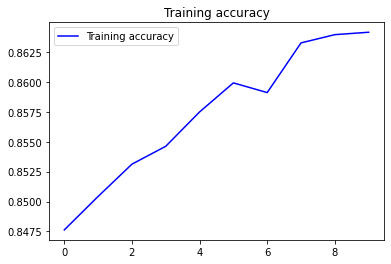

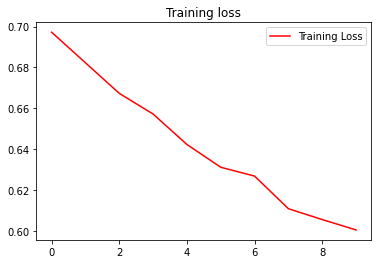

In [40]:
# visualizing how loss and accuracy changed while training
import matplotlib.pyplot as plt

acc = h['accuracy']
loss = h['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()